In [130]:
source("../00_model-fitting/wwa_model-fitting.R")
library(extRemes)
suppressMessages(library(plyr))

In [131]:
# load data
gmst <- read.fwf("../../Data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"))
nino <- read.csv("data/nino34rel_october.csv")
iod <- read.csv("data/iod_october.csv")

---
## **Significance of other covariates**

### **Significance in normal linear model**

In [157]:
# load data
fnm <- "data/era5_madagascar_t2m-mean.csv"
df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))

mdls <- c("gmst", "nino34", "iod", "gmst + nino34", "gmst * nino34", "gmst + iod", "gmst * iod")
res <- rbind.fill(sapply(mdls, function(f) data.frame(t(summary(lm(paste0("var ~ ", f), df))$coef[,4])), simplify = F)) < 0.05
coeffs <- rbind.fill(sapply(mdls, function(f) data.frame(t(lm(paste0("var ~ ", f), df)$coef)), simplify = F))
rownames(res) <- mdls
cbind(res, coeffs)
                            
cf_tmean <- coeffs[c(1,6),"gmst"]

,X.Intercept.,gmst,nino34,iod,gmst.nino34,gmst.iod,X.Intercept.,gmst,nino34,iod,gmst.nino34,gmst.iod
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gmst,TRUE,TRUE,NA,NA,NA,NA,22.60206,1.186222,NA,NA,NA,NA
nino34,TRUE,NA,FALSE,NA,NA,NA,22.96978,NA,-0.02353634,NA,NA,NA
iod,TRUE,NA,NA,TRUE,NA,NA,22.91993,NA,NA,0.3442553,NA,NA
gmst + nino34,TRUE,TRUE,FALSE,NA,NA,NA,22.60111,1.190316,0.01423254,NA,NA,NA
gmst * nino34,TRUE,TRUE,FALSE,NA,FALSE,NA,22.60127,1.186149,0.02706582,NA,-0.03648458,NA
gmst + iod,TRUE,TRUE,NA,TRUE,NA,NA,22.59867,1.097819,NA,0.2106846,NA,NA
gmst * iod,TRUE,TRUE,NA,FALSE,NA,FALSE,22.60767,1.038731,NA,0.0990030,NA,0.2793669


In [158]:
# load data
fnm <- "data/era5_antananarivo_tx7x.csv"
df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))

mdls <- c("gmst", "nino34", "iod", "gmst + nino34", "gmst * nino34", "gmst + iod", "gmst * iod")
res <- rbind.fill(sapply(mdls, function(f) data.frame(t(summary(lm(paste0("var ~ ", f), df))$coef[,4])), simplify = F)) < 0.05
coeffs <- rbind.fill(sapply(mdls, function(f) data.frame(t(lm(paste0("var ~ ", f), df)$coef)), simplify = F))
rownames(res) <- mdls
cbind(res, coeffs)
                            
cf_tmax <- coeffs[c(1,6),"gmst"]

,X.Intercept.,gmst,nino34,iod,gmst.nino34,gmst.iod,X.Intercept.,gmst,nino34,iod,gmst.nino34,gmst.iod
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gmst,TRUE,TRUE,NA,NA,NA,NA,26.06393,1.558727,NA,NA,NA,NA
nino34,TRUE,NA,FALSE,NA,NA,NA,26.54396,NA,-0.1724823,NA,NA,NA
iod,TRUE,NA,NA,FALSE,NA,NA,26.48609,NA,NA,0.4217417,NA,NA
gmst + nino34,TRUE,TRUE,FALSE,NA,NA,NA,26.07224,1.523021,-0.1241566,NA,NA,NA
gmst * nino34,TRUE,TRUE,FALSE,NA,FALSE,NA,26.07041,1.569408,-0.2670398,NA,0.4062119,NA
gmst + iod,TRUE,TRUE,NA,FALSE,NA,NA,26.05999,1.456102,NA,0.2445791,NA,NA
gmst * iod,TRUE,TRUE,NA,FALSE,NA,FALSE,26.09503,1.226007,NA,-0.1903141,NA,1.087867


In [159]:
# load data
fnm <- "data/era5_antananarivo_tn7x.csv"
df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))

mdls <- c("gmst", "nino34", "iod", "gmst + nino34", "gmst * nino34", "gmst + iod", "gmst * iod")
res <- rbind.fill(sapply(mdls, function(f) data.frame(t(summary(lm(paste0("var ~ ", f), df))$coef[,4])), simplify = F)) < 0.05
coeffs <- rbind.fill(sapply(mdls, function(f) data.frame(t(lm(paste0("var ~ ", f), df)$coef)), simplify = F))
rownames(res) <- mdls
cbind(res, coeffs)

cf_tmin <- coeffs[c(1,6),"gmst"]

,X.Intercept.,gmst,nino34,iod,gmst.nino34,gmst.iod,X.Intercept.,gmst,nino34,iod,gmst.nino34,gmst.iod
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gmst,TRUE,TRUE,NA,NA,NA,NA,13.41421,1.542387,NA,NA,NA,NA
nino34,TRUE,NA,FALSE,NA,NA,NA,13.89388,NA,0.03853416,NA,NA,NA
iod,TRUE,NA,NA,TRUE,NA,NA,13.81955,NA,NA,0.5020317,NA,NA
gmst + nino34,TRUE,TRUE,FALSE,NA,NA,NA,13.40830,1.567775,0.08827989,NA,NA,NA
gmst * nino34,TRUE,TRUE,FALSE,NA,FALSE,NA,13.40980,1.529538,0.20605999,NA,-0.3348448,NA
gmst + iod,TRUE,TRUE,NA,TRUE,NA,NA,13.40887,1.403381,NA,0.3312836,NA,NA
gmst * iod,TRUE,TRUE,NA,FALSE,NA,FALSE,13.41091,1.390028,NA,0.3060450,NA,0.06313317


In [160]:
# change in GMST covariate when IOD is added to model
cbind(cf_tmean, cf_tmax, cf_tmin)

cf_tmean,cf_tmax,cf_tmin
1.186222,1.558727,1.542387
1.097819,1.456102,1.403381


### **Fitted trend models (normal / GEV)**


#### **Madagascar tmean**

In [346]:
fnm <- "data/era5_madagascar_t2m-mean.csv"
df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))


tm_models <- list("gmst_incl2023" = lm(var ~ gmst, df),
                  "gmst+iod_incl2023" = lm(var ~ gmst + iod, df),
                  "gmst_2022" = lm(var ~ gmst, df[df$year < 2023,]),
                  "gmst+iod_2022" = lm(var ~ gmst + iod, df[df$year < 2023,]))

In [378]:
tm_res <- sapply(tm_models, function(mdl) unname(mdl$coef["gmst"])) * 1.2
tm_res <- c(tm_res, setNames(diff(tm_res)[c(1,3)], c("diff_incl2023", "diff_excl2023")))

tm_res["sig_incl2023"] = anova(tm_models[["gmst_incl2023"]], tm_models[["gmst+iod_incl2023"]], test = "LRT")[2,"Pr(>Chi)"]
tm_res["sig_2022"] = anova(tm_models[["gmst_2022"]], tm_models[["gmst+iod_2022"]], test = "LRT")[2,"Pr(>Chi)"]
tm_res["iod_coef"] = tm_models[["gmst+iod_incl2023"]]$coef["iod"]

tm_res <- data.frame(t(tm_res), row.names = "tmean")


#### **Antananarivo tmax**

In [376]:
fnm <- "data/era5_antananarivo_tx7x.csv"
df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))

tx_models <- list("gmst_incl2023" = fevd(var, df, location.fun = ~ gmst),
                  "gmst+iod_incl2023" = fevd(var, df, location.fun = ~ gmst + iod),
                  "gmst_2022" = fevd(var, df[df$year < 2023,], location.fun = ~ gmst),
                  "gmst+iod_2022" = fevd(var, df[df$year < 2023,], location.fun = ~ gmst + iod))

tx_res <- sapply(tx_models, function(mdl) unname(strip(mdl)["mu1"])) * 1.2
tx_res <- c(tx_res, setNames(diff(tx_res)[c(1,3)], c("diff_incl2023", "diff_excl2023")))

tx_res["sig_incl2023"] = (lr.test(tx_models[["gmst_incl2023"]], tx_models[["gmst+iod_incl2023"]])$p.value)
tx_res["sig_2022"] = (lr.test(tx_models[["gmst_2022"]], tx_models[["gmst+iod_2022"]])$p.value)
tx_res["iod_coef"] = strip(tx_models[["gmst+iod_incl2023"]])["mu2"]

tx_res <- data.frame(t(tx_res), row.names = "tx7x")


#### **Antananarivo tmin**

In [379]:
fnm <- "data/era5_antananarivo_tn7x.csv"
df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))

tn_models <- list("gmst_incl2023" = fevd(var, df, location.fun = ~ gmst),
                  "gmst+iod_incl2023" = fevd(var, df, location.fun = ~ gmst + iod),
                  "gmst_2022" = fevd(var, df[df$year < 2023,], location.fun = ~ gmst),
                  "gmst+iod_2022" = fevd(var, df[df$year < 2023,], location.fun = ~ gmst + iod))

tn_res <- sapply(tn_models, function(mdl) unname(strip(mdl)["mu1"])) * 1.2
tn_res <- c(tn_res, setNames(diff(tn_res)[c(1,3)], c("diff_incl2023", "diff_excl2023")))

tn_res["sig_incl2023"] = (lr.test(tn_models[["gmst_incl2023"]], tn_models[["gmst+iod_incl2023"]])$p.value)
tn_res["sig_2022"] = (lr.test(tn_models[["gmst_2022"]], tn_models[["gmst+iod_2022"]])$p.value)
tn_res["iod_coef"] = strip(tn_models[["gmst+iod_incl2023"]])["mu2"]

tn_res <- data.frame(t(tn_res), row.names = "tn7x")

#### **Summarise changes in fitted models**

In [389]:
round(rbind(tm_res, tx_res, tn_res), 3)

,gmst_incl2023,gmst.iod_incl2023,gmst_2022,gmst.iod_2022,diff_incl2023,diff_excl2023,sig_incl2023,sig_2022,iod_coef
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
tmean,1.423,1.317,1.305,1.244,-0.106,-0.061,0.036,0.116,0.211
tx7x,1.953,1.822,1.762,1.735,-0.131,-0.027,0.505,0.878,0.217
tn7x,1.784,1.615,1.672,1.568,-0.169,-0.103,0.025,0.054,0.323


---
## **Linearity of observations**


### **Madagascar October mean temperatures**

In [110]:
fnm <- "data/era5_madagascar_t2m-mean.csv"

df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))
df$gmst2 <- df$gmst^2
df$year2 <- df$year^2

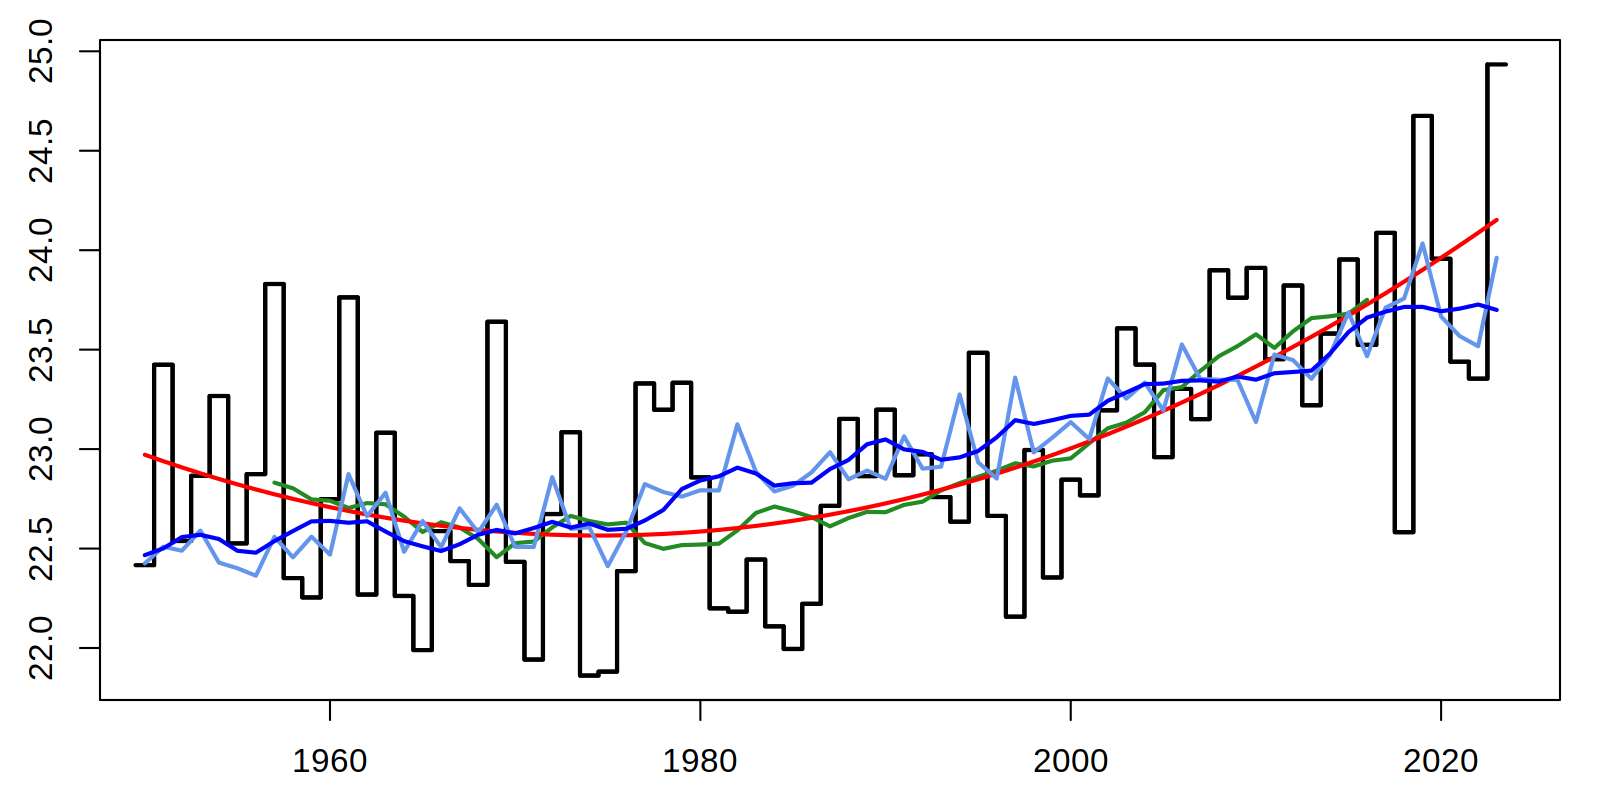

In [116]:
prep_window(c(1,2)); par(mfrow = c(1,1), mar = c(2.5,2.5,1,1))
plot(df$year+0.5, df$var, type = "S", lwd = 2, xlab = "", ylab = "")
lines(df$year-0.5, df$var, type = "s", lwd = 2)

lines(df$year, filter(df$var, rep(1/15,15), sides = 2), lwd = 2, col = "forestgreen")

# quadratic fits
lines(df$year, lm(var ~ year + year2, df)$fitted, lwd = 2, col = "red")

# linear fit to all years
lines(df$year, lm(var ~ gmst + iod, df)$fitted, lwd = 2, type = "l", col = "cornflowerblue")
lines(df$year, lm(var ~ gmst, df)$fitted, lwd = 2, col = "blue")

# # linear fit to recent decades
# lines(df$year[df$year >= 1980], lm(var ~ gmst + iod, df[df$year >= 1980,])$fitted, lwd = 2, col = "cornflowerblue")
# lines(df$year[df$year >= 1980], lm(var ~ gmst, df[df$year >= 1980,])$fitted, lwd = 2, col = "darkblue")

# # quadratic fit to GMST
# lines(df$year, lm(var ~ gmst + gmst2, df)$fitted, lwd = 2, col = "darkred")


### **Antananarivo tmax**

In [121]:
fnm <- "data/era5_antananarivo_tx7x.csv"

df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))
df$gmst2 <- df$gmst^2
df$year2 <- df$year^2

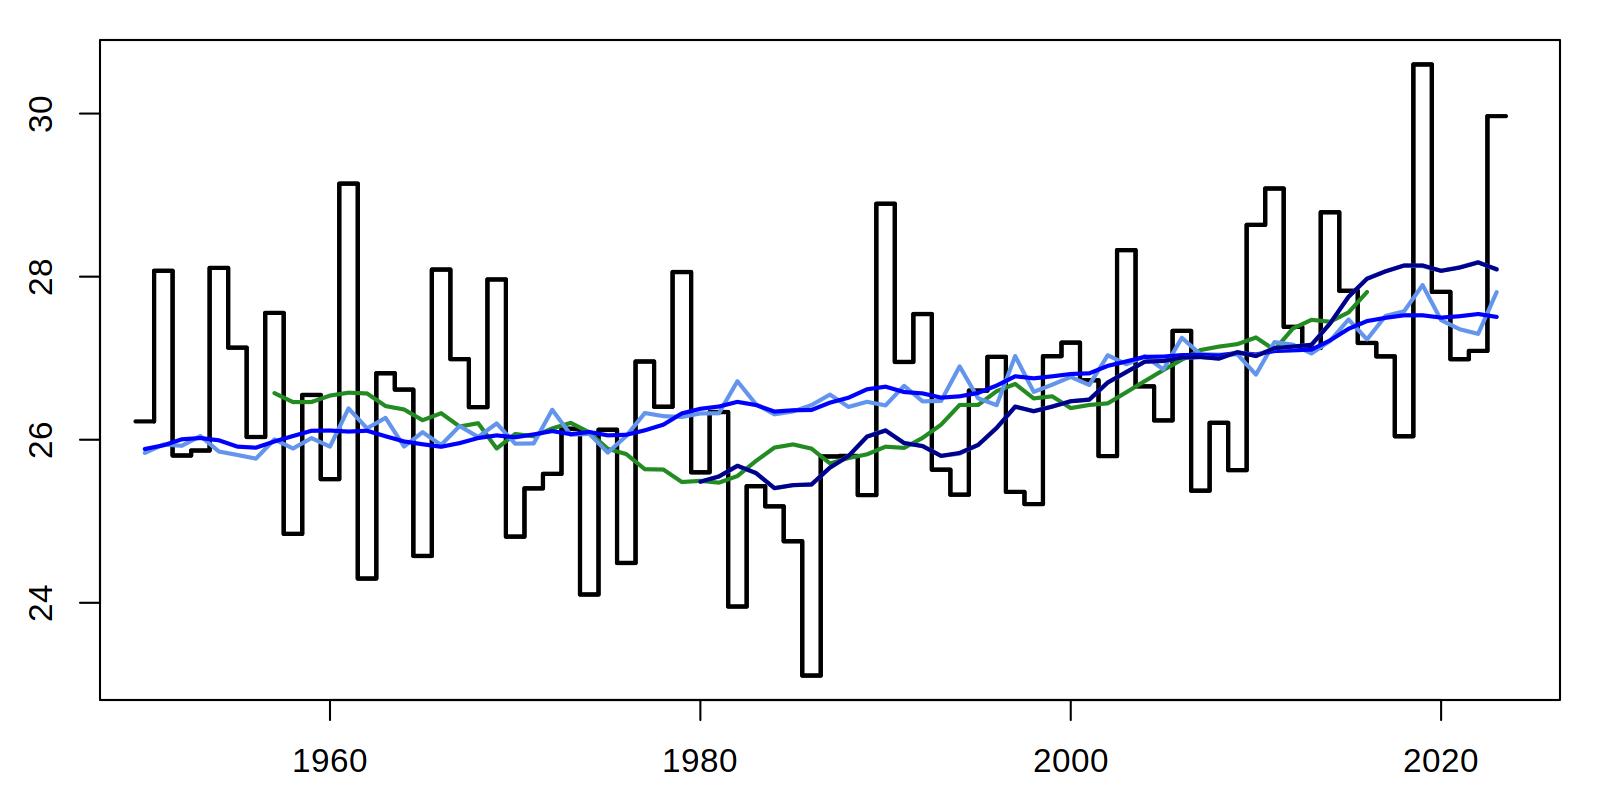

In [124]:
prep_window(c(1,2)); par(mfrow = c(1,1), mar = c(2.5,2.5,1,1))
plot(df$year+0.5, df$var, type = "S", lwd = 2, xlab = "", ylab = "")
lines(df$year-0.5, df$var, type = "s", lwd = 2)

lines(df$year, filter(df$var, rep(1/15,15), sides = 2), lwd = 2, col = "forestgreen")

# quadratic fits
# lines(df$year, lm(var ~ year + year2, df)$fitted, lwd = 2, col = "red")

# linear fit to all years
lines(df$year, lm(var ~ gmst + iod, df)$fitted, lwd = 2, type = "l", col = "cornflowerblue")
lines(df$year, lm(var ~ gmst, df)$fitted, lwd = 2, col = "blue")

# # linear fit to recent decades
lines(df$year[df$year >= 1980], lm(var ~ gmst + iod, df[df$year >= 1980,])$fitted, lwd = 2, col = "cornflowerblue")
lines(df$year[df$year >= 1980], lm(var ~ gmst, df[df$year >= 1980,])$fitted, lwd = 2, col = "darkblue")

# quadratic fit to GMST
# lines(df$year, lm(var ~ gmst + gmst2, df)$fitted, lwd = 2, col = "darkred")




### **Antananarivo tmin**

In [125]:
fnm <- "data/era5_antananarivo_tn7x.csv"

df <- merge(merge(merge(gmst, nino), iod), read.csv(fnm))
df$gmst2 <- df$gmst^2
df$year2 <- df$year^2

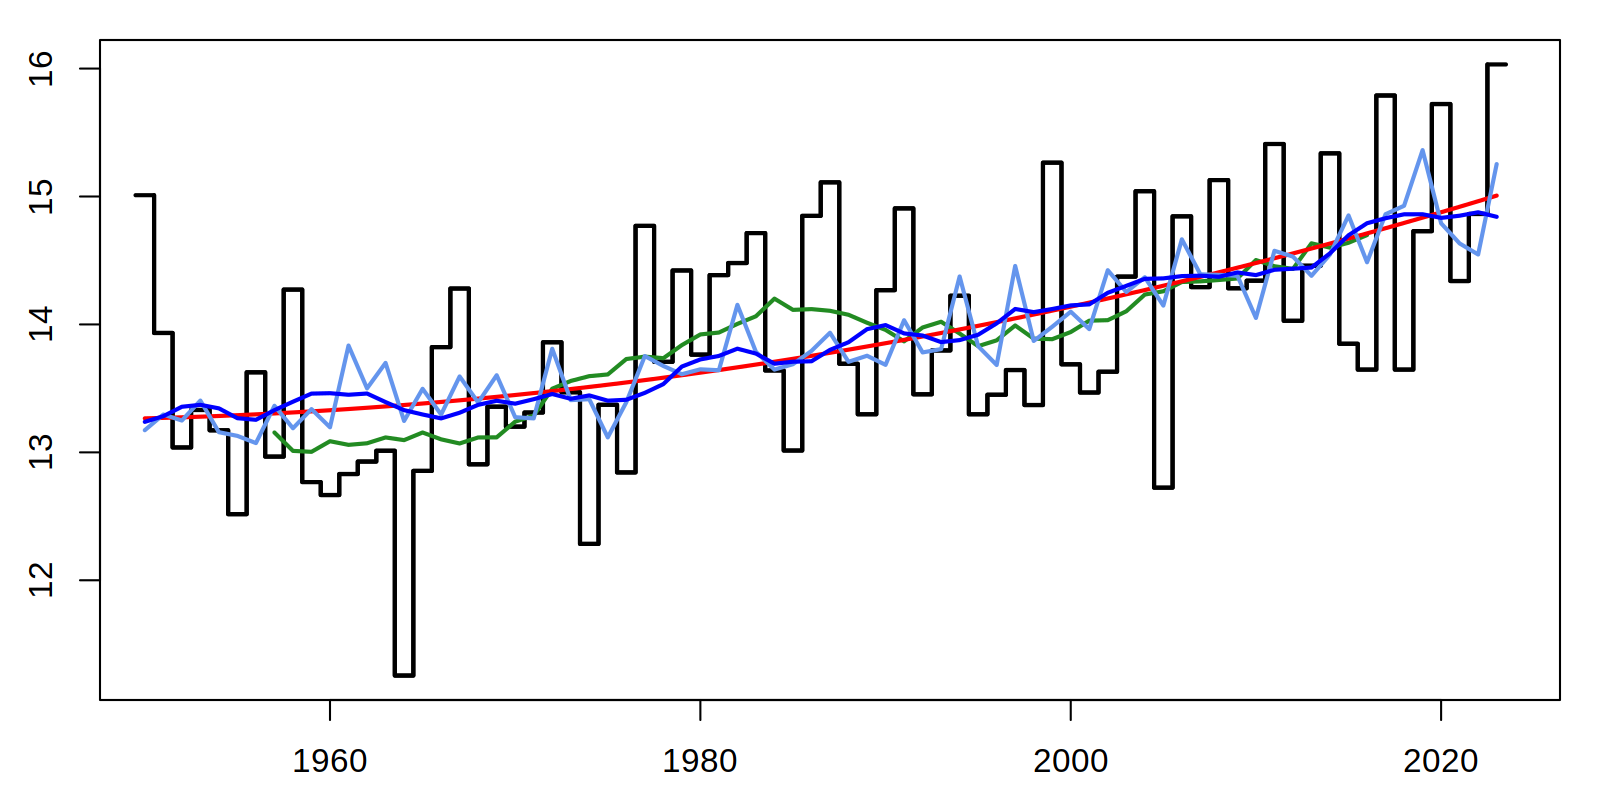

In [128]:
prep_window(c(1,2)); par(mfrow = c(1,1), mar = c(2.5,2.5,1,1))
plot(df$year+0.5, df$var, type = "S", lwd = 2, xlab = "", ylab = "")
lines(df$year-0.5, df$var, type = "s", lwd = 2)

lines(df$year, filter(df$var, rep(1/15,15), sides = 2), lwd = 2, col = "forestgreen")

# quadratic fits
lines(df$year, lm(var ~ year + year2, df)$fitted, lwd = 2, col = "red")

# linear fit to all years
lines(df$year, lm(var ~ gmst + iod, df)$fitted, lwd = 2, type = "l", col = "cornflowerblue")
lines(df$year, lm(var ~ gmst, df)$fitted, lwd = 2, col = "blue")

# # linear fit to recent decades
# lines(df$year[df$year >= 1980], lm(var ~ gmst + iod, df[df$year >= 1980,])$fitted, lwd = 2, col = "cornflowerblue")
# lines(df$year[df$year >= 1980], lm(var ~ gmst, df[df$year >= 1980,])$fitted, lwd = 2, col = "darkblue")

# quadratic fit to GMST
# lines(df$year, lm(var ~ gmst + gmst2, df)$fitted, lwd = 2, col = "darkred")



---
## **LR test with GEV**

In [95]:
mdl_gmst <- fevd(var, df, location.fun = ~ gmst)
mdl_gmst_iod <- fevd(var, df, location.fun = ~ gmst + iod)

In [22]:
c(summary(mdl_gmst)$AIC, summary(mdl_gmst_iod)$AIC)


fevd(x = var, data = df, location.fun = ~gmst)

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  82.63551 


 Estimated parameters:
       mu0        mu1      scale      shape 
13.1760812  1.4863778  0.7475926 -0.3006160 

 Standard Error Estimates:
       mu0        mu1      scale      shape 
0.12769907 0.25479311 0.06735000 0.07395368 

 Estimated parameter covariance matrix.
                mu0          mu1         scale        shape
mu0    0.0163070536 -0.021670554  0.0002946562 -0.004054607
mu1   -0.0216705540  0.064919527 -0.0012506890  0.004498019
scale  0.0002946562 -0.001250689  0.0045360218 -0.002859641
shape -0.0040546073  0.004498019 -0.0028596410  0.005469146

 AIC = 173.271 

 BIC = 182.4873 

fevd(x = var, data = df, location.fun = ~gmst + iod)

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  80.10674 


 Estimated parameters:
       mu0        mu1        mu2      scale      shape 
13.1748898  1.3458871  0.3225403  0.7176195 -0.2

[1] 173.2710 170.2135